In [204]:
import pandas as pd
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
mlflow.set_experiment("Film Box Office Prediction")
df = pd.read_csv("film_v3.csv")


In [207]:
numeric_columns = [
    'entrees_demarrage_france', 'entrees_totales_france', 'budget',
    'recette_usa', 'recette_reste_du_monde', 'recette_monde', 'note_moyenne'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [208]:
print(df.dtypes)

film_id                       int64
titre                        object
genre_principale             object
date_sortie_france           object
date_sortie_usa              object
image_url                    object
synopsis                     object
duree                        object
note_moyenne                float64
acteurs                      object
entrees_demarrage_france    float64
entrees_totales_france      float64
budget                      float64
recette_usa                 float64
recette_reste_du_monde      float64
recette_monde               float64
duree_minutes               float64
annee_sortie                  int64
age_du_film                   int64
dtype: object


In [209]:
X = df.drop(columns=['entrees_demarrage_france'])
y = df ['entrees_demarrage_france']

In [210]:
print("\nStatistiques descriptives des features numériques:")
print(X.describe())
print("\nStatistiques de la variable cible:")
print(y.describe())


Statistiques descriptives des features numériques:
            film_id  note_moyenne  entrees_totales_france        budget  \
count   1735.000000   1172.000000               14.000000  5.500000e+02   
mean   22373.256484      3.215870              420.428571  5.016817e+07   
std     1383.557876      0.815302              249.103844  6.476758e+07   
min    10412.000000      1.000000               40.000000  1.500000e+05   
25%    21398.000000      3.000000              255.250000  6.500000e+06   
50%    22525.000000      3.000000              522.000000  2.000000e+07   
75%    23490.000000      4.000000              553.750000  7.350000e+07   
max    24555.000000      5.000000              889.000000  3.500000e+08   

        recette_usa  recette_reste_du_monde  recette_monde  duree_minutes  \
count  6.820000e+02            1.197000e+03   1.241000e+03    1728.000000   
mean   4.327447e+07            3.839253e+07   6.081309e+07     104.668403   
std    9.504102e+07            1.132765e+

In [212]:
print(f"Nombre total de films dans le CSV: {len(df1)}")

Nombre total de films dans le CSV: 1735


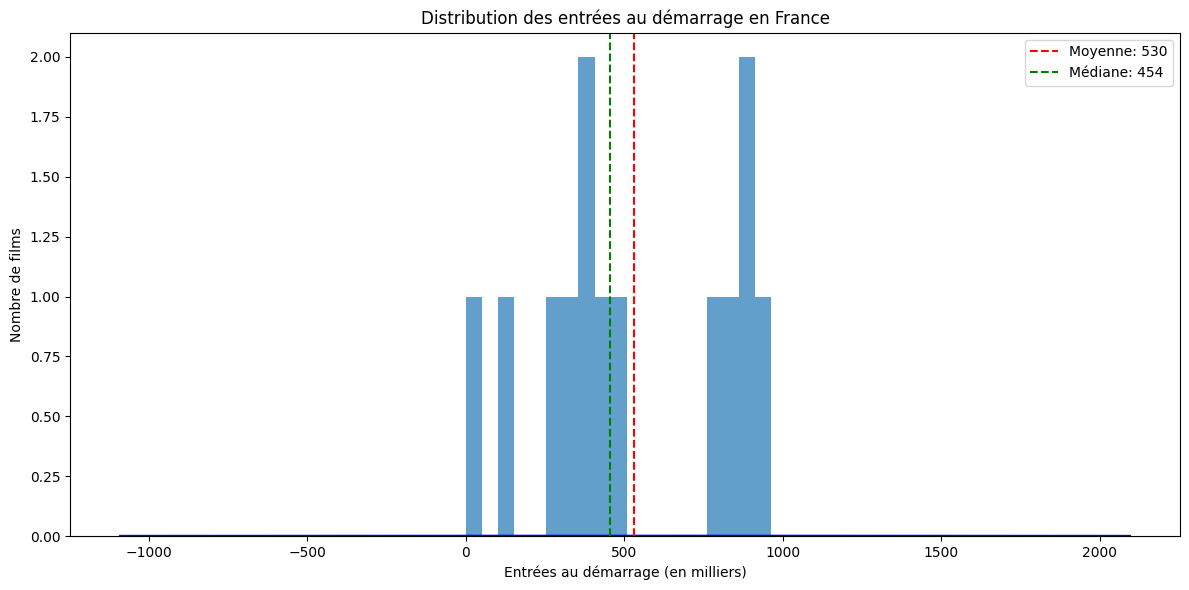

In [214]:
plt.figure(figsize=(12, 6))

# Utiliser un nombre de bins beaucoup plus petit pour regrouper les films
bins = np.linspace(0, y.max(), 20)  # 20 intervalles de 0 au maximum
plt.hist(y, bins=bins, alpha=0.7)

# Ajouter KDE avec une largeur de bande plus grande
sns.kdeplot(y, color='blue', linewidth=2, bw_adjust=2.0)

# Ajout des lignes pour la moyenne et la médiane
plt.axvline(y.mean(), color='red', linestyle='--', label=f'Moyenne: {y.mean():.0f}')
plt.axvline(y.median(), color='green', linestyle='--', label=f'Médiane: {y.median():.0f}')

plt.title('Distribution des entrées au démarrage en France')
plt.xlabel('Entrées au démarrage (en milliers)')
plt.ylabel('Nombre de films')
plt.legend()
plt.tight_layout()
plt.savefig('distribution_improved.png')
plt.show()

In [217]:
# Nombre de lignes où la variable cible est vide (NaN)
nb_lignes_target_vide = df['entrees_demarrage_france'].isna().sum()
print(f"Nombre de lignes où entrees_demarrage_france est vide : {nb_lignes_target_vide}")

# Pourcentage de valeurs manquantes
pourcentage_manquant = (nb_lignes_target_vide / len(df)) * 100
print(f"Pourcentage de valeurs manquantes : {pourcentage_manquant:.2f}%")

Nombre de lignes où entrees_demarrage_france est vide : 1722
Pourcentage de valeurs manquantes : 99.25%


In [216]:
# Vérifier le nombre de valeurs uniques
num_unique = y.nunique()
print(f"Nombre de valeurs uniques: {num_unique} sur {len(y)} films")

# Afficher les 10 valeurs les plus fréquentes
top_values = y.value_counts().head(10)
print("\nLes 10 valeurs les plus fréquentes:")
print(top_values)

# Statistiques pour comprendre la distribution
print("\nStatistiques de distribution:")
print(f"Min: {y.min()}")
print(f"Max: {y.max()}")
print(f"Écart-type: {y.std()}")
print(f"Asymétrie (skewness): {y.skew()}")  # Mesure de l'asymétrie

Nombre de valeurs uniques: 13 sur 1735 films

Les 10 valeurs les plus fréquentes:
entrees_demarrage_france
890.0    1
889.0    1
133.0    1
489.0    1
344.0    1
40.0     1
861.0    1
274.0    1
454.0    1
365.0    1
Name: count, dtype: int64

Statistiques de distribution:
Min: 40.0
Max: 964.0
Écart-type: 314.4434644060714
Asymétrie (skewness): 0.06500355147370407
